In [1]:
# Import all necessity functions for Machine Learning
import cv2
import os
import re
import sys
import math
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split,\
                                    KFold, StratifiedKFold,\
                                    GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import classification_report, mean_absolute_error,\
                            mean_squared_error, r2_score, accuracy_score,\
                            recall_score, precision_score, f1_score, silhouette_score

# Download keras
!pip install keras

# Import all necessity functions for Neural Network
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

# Plotting the confusion matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix


In [2]:
# Remove all warnings
import warnings
warnings.filterwarnings("ignore")

#####Import the dataset

In [3]:
df = pd.read_csv('/content/CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


###EDA Perform

In [4]:
# Check the shape of the data
print("Records  # {} ".format(df.shape[0]))
print("Features # {} ".format(df.shape[1]))

Records  # 3893 
Features # 9 


In [5]:
# Check the datatype
for feature, data_type in zip(df.dtypes.index, df.dtypes.values):
  print("{} dtype # {} ".format(feature, data_type))

Sex dtype # object 
Length dtype # float64 
Diameter dtype # float64 
Height dtype # float64 
Weight dtype # float64 
Shucked Weight dtype # float64 
Viscera Weight dtype # float64 
Shell Weight dtype # float64 
Age dtype # int64 


In [6]:
# Check the describe of the data
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [7]:
# Check NaN value
'NaN in the dataset' if df.isnull().sum().sum() > 0 else 'No NaN in the dataset'

'No NaN in the dataset'

In [8]:
# Check the duplicate instances
'Duplicate instances' if df.duplicated().sum() > 0 else 'No duplicate instances'

'No duplicate instances'

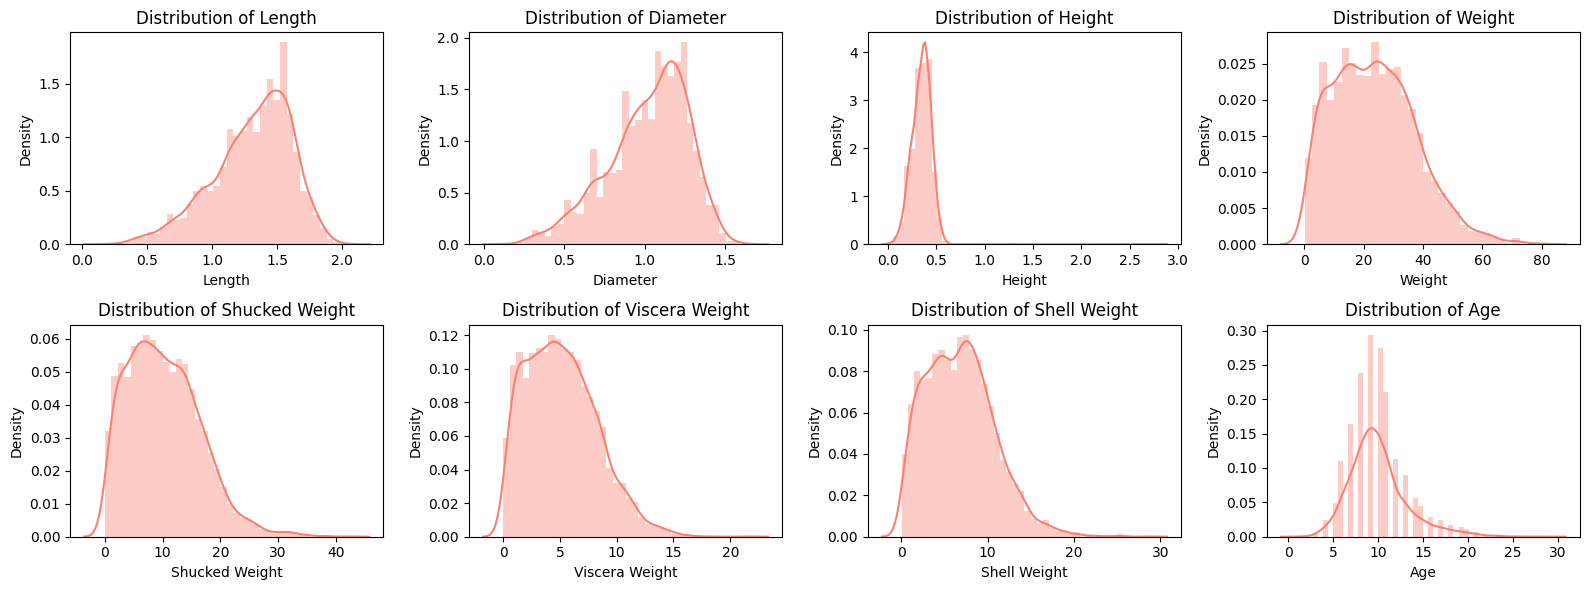

In [9]:
# Check the distribution of the inpdependent features
independent = df.columns[1:]

plt.figure(figsize=(16, 6))
for index, feature in enumerate(independent):
    plt.subplot(2, 4, index + 1)
    plt.title("Distribution of {}".format(feature))
    sns.distplot(df.loc[:, feature], kde=True, color='salmon')  # Custom color for the plot

plt.tight_layout()
plt.show()

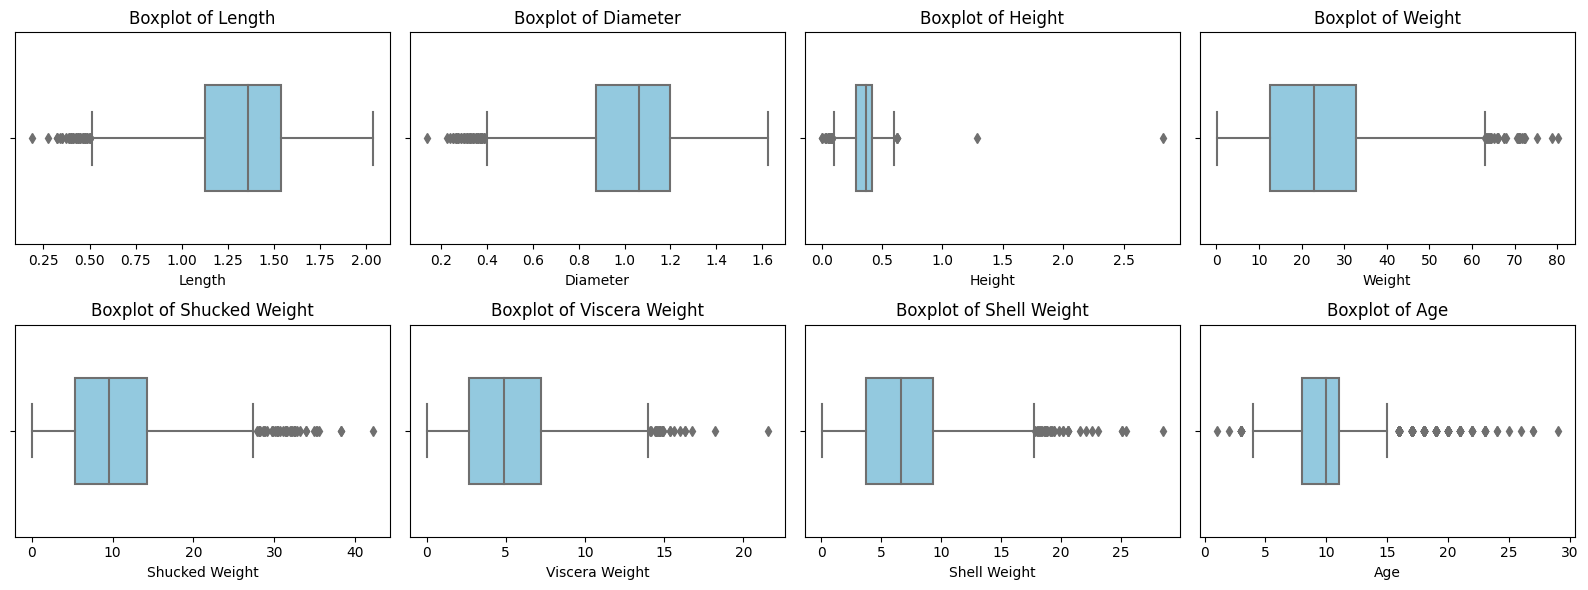

In [10]:
# Check the boxplot
independent = df.columns[1:]
plt.figure(figsize=(16, 6))
for index, feature in enumerate(independent):
    plt.subplot(2, 4, index + 1)
    plt.title("Boxplot of {}".format(feature))
    sns.boxplot(data=df, x=feature, color='skyblue', width=0.5)
plt.tight_layout()
plt.show()

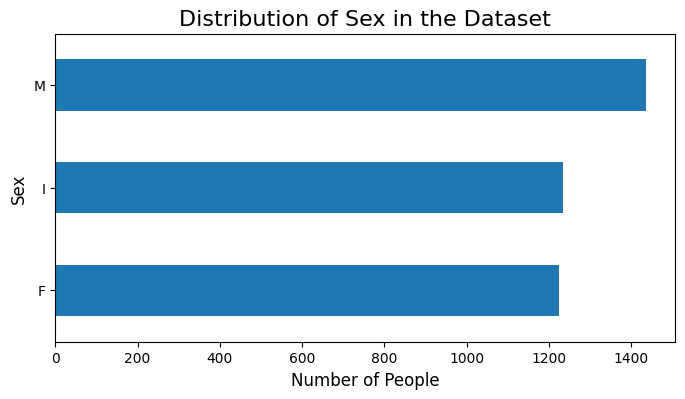

In [11]:
# Show the value counts of Age
plt.figure(figsize=(8, 4))

df['Sex'].value_counts().plot(kind='barh')

# Adding some customizations to the plot
plt.title('Distribution of Sex in the Dataset', fontsize=16)
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Sex', fontsize=12)

# Inverting the y-axis to show 'Male' on top
plt.gca().invert_yaxis()

plt.show()

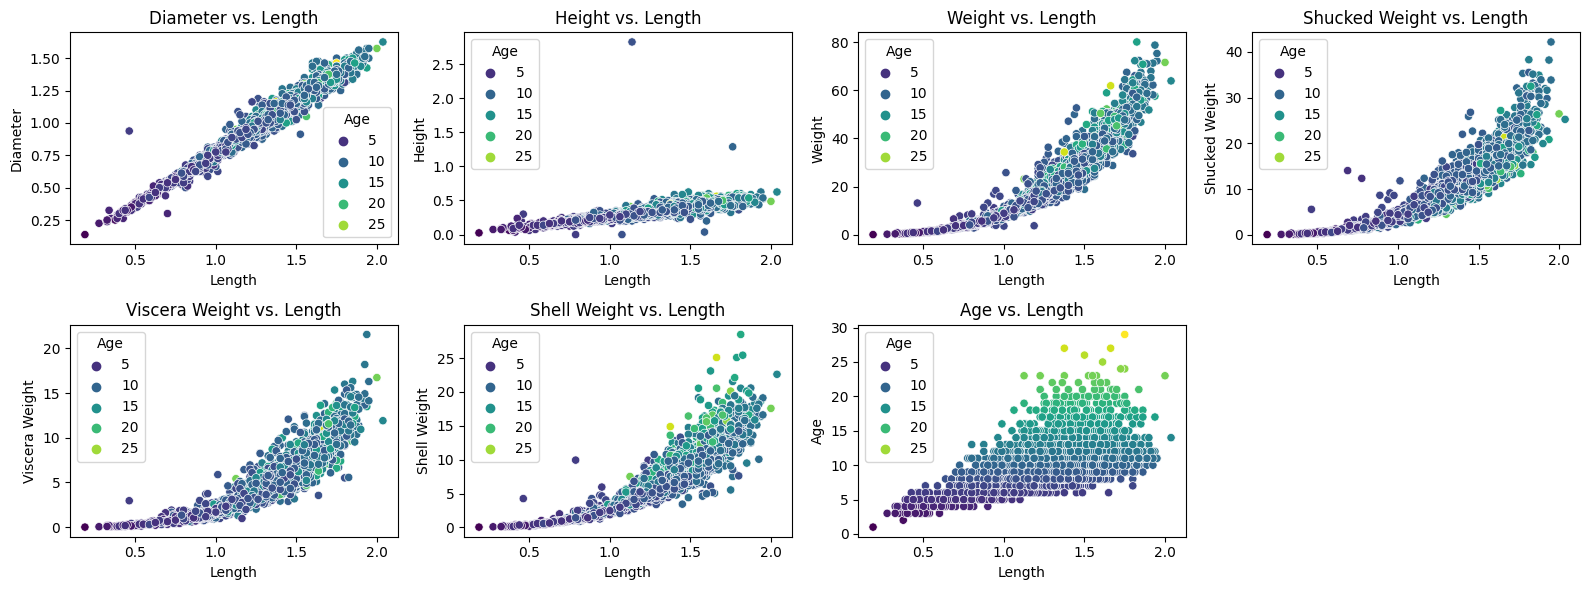

In [12]:
columns_pick = df.columns[2:]

# Check if DataFrame is empty
if df.empty:
    print("DataFrame is empty. Please make sure your data is loaded correctly.")
else:
    plt.figure(figsize=(16, 6))

    # Check if there are enough subplots for the selected columns
    num_subplots = len(columns_pick)
    num_rows = 2
    num_cols = 4

    if num_subplots > num_rows * num_cols:
        print("Not enough subplots to accommodate all selected columns.")
    else:
        for index, feature in enumerate(columns_pick):
            plt.subplot(num_rows, num_cols, index + 1)
            sns.scatterplot(x = 'Length', y = feature, hue = 'Age', data = df, palette = 'viridis')
            plt.title(f"{feature} vs. Length")

        plt.tight_layout()
        plt.show()

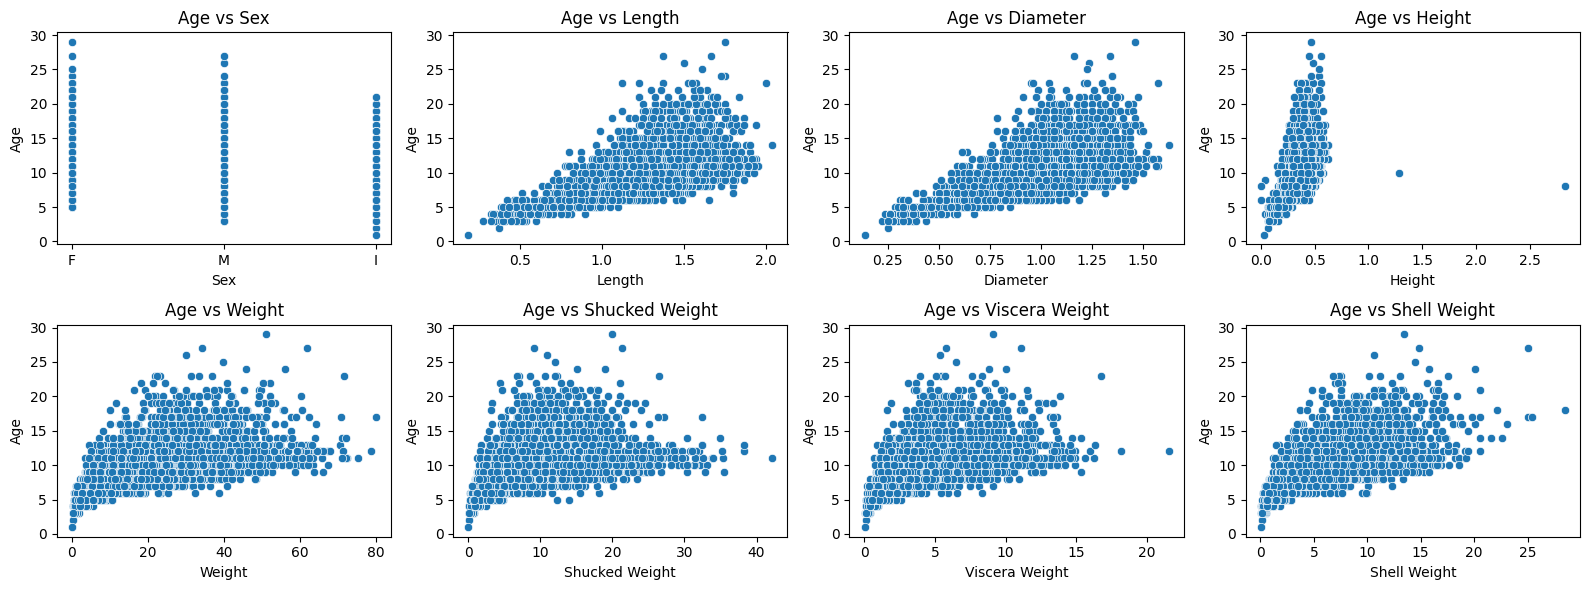

In [13]:
# Find the realtionship of age with all
# Check if there are enough subplots for the selected columns
plt.figure(figsize=(16, 6))
num_subplots = len(df.columns[:-1])
num_rows = 2
num_cols = 4

if num_subplots > num_rows * num_cols:
  print('Not possible')
else:
  for index, feature in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(x = feature , y = 'Age', data = df, palette='cubehelix')
    plt.title('Age vs {}'.format(feature))

  plt.tight_layout()
  plt.show()

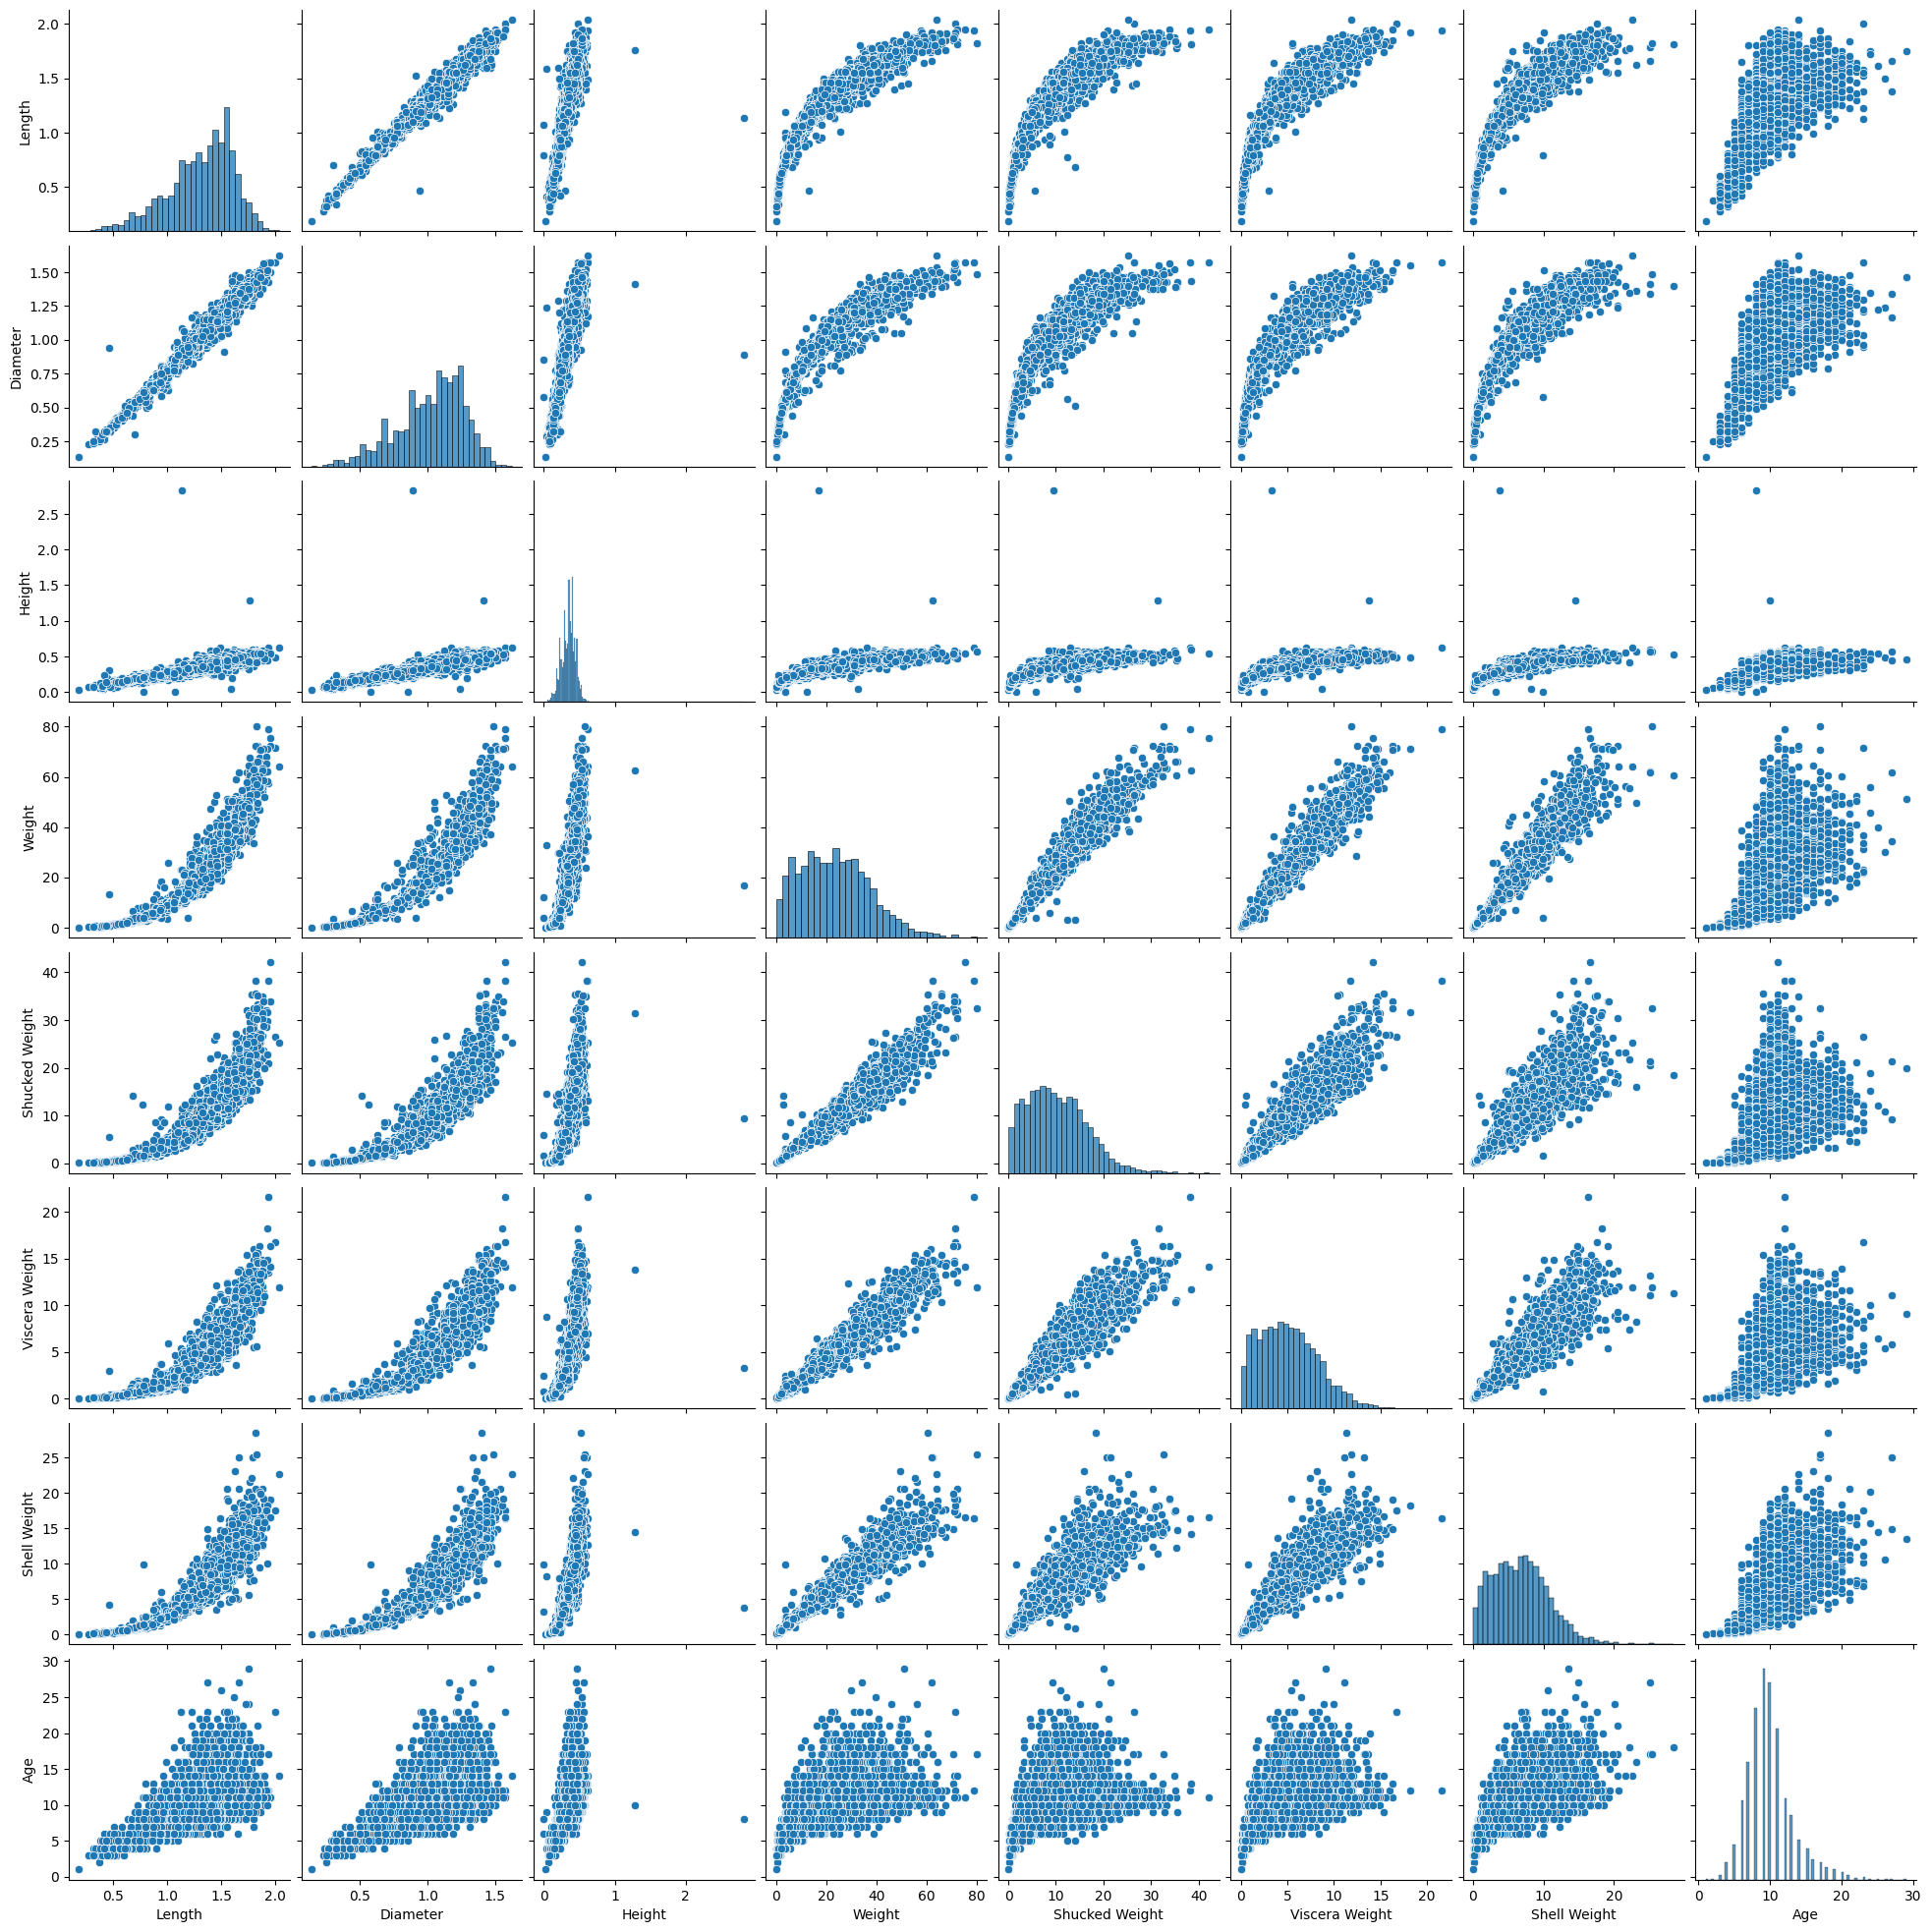

In [14]:
# Find the pairplot
sns.pairplot(df)
plt.show()

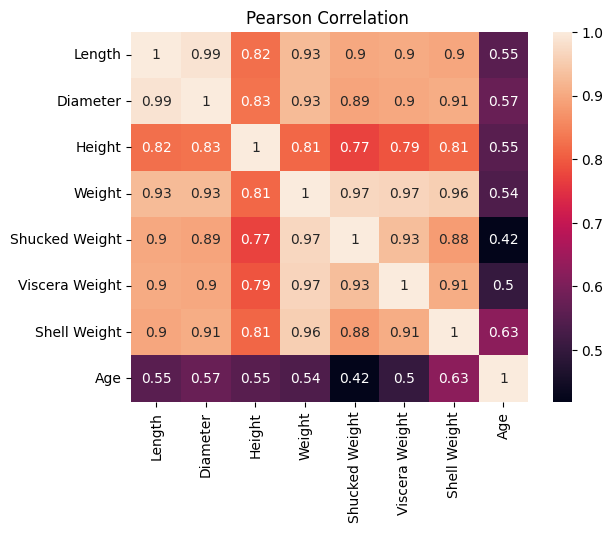

In [15]:
# See the correlation
plt.title('Pearson Correlation ')
sns.heatmap(df.corr(), annot = True)
plt.show()

#####Feature Engineering

In [16]:
# Convert the categorical data into the numerical representation
df.loc[:, 'Sex'] = df.loc[:, 'Sex'].map({ value: index for index, value in enumerate(df.loc[:, 'Sex'].value_counts().index)})

df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,2,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,0,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,1,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,2,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,1,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


#####Feature Selection using Pearson Correlation Technique

In [17]:
# Define a function named correaltion
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    ###### Run a Loop ######
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Call this function with the threshold & dataframe
if __name__ == "__main__":
  THRESHOLD = 0.90
  features = correlation(dataset = df, threshold = THRESHOLD)
  print("Correlated features are # {} ".format(features))

# Define the new dataframe
df = df.loc[:, [False if feature in list(features) else True for feature in df.columns]]

df.head()

Correlated features are # {'Viscera Weight', 'Shucked Weight', 'Weight', 'Shell Weight', 'Diameter'} 


,Sex,Length,Height,Age
0,2,1.4375,0.4125,9
1,0,0.8875,0.2125,6
2,1,1.0375,0.2500,6
3,2,1.1750,0.2500,10
4,1,0.8875,0.2125,6


#####Split the dataset into train and test

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X_train shape # {} ".format(X_train.shape),'\n')
print("X_test shape  # {} ".format(X_test.shape),'\n')
print("y_train shape # {} ".format(y_train.shape),'\n')
print("y_test shape  # {} ".format(y_test.shape))

X_train shape # (2725, 3)  

X_test shape  # (1168, 3)  

y_train shape # (2725,)  

y_test shape  # (1168,) 


##### Do the scaling using MinMax

In [19]:
minmax_scaling = MinMaxScaler()
X_train = minmax_scaling.fit_transform(X_train)
print("X_train is done.")
X_test  = minmax_scaling.transform(X_test)
print("X_test is done.")

X_train is done.
X_test is done.


#####Import the necessity library of PyTorch

In [20]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

#####Import the DataLoader with BATCH_SIZE = 64

In [21]:
BATCH_SIZE = 64

train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

print("The batch size of train # {} ".format(train_loader.batch_size),'\n')
print("The batch size of test  # {} ".format(test_loader.batch_size),'\n')

train_data, train_label = next(iter(train_loader))
test_data, test_label   = next(iter(train_loader))

print("Shape of train data with batch size  # {} ".format(train_data.shape),'\n')
print("Shape of train label with batch size # {} ".format(train_label.shape),'\n')

print("Shape of test data with batch size  # {} ".format(test_data.shape),'\n')
print("Shape of test label with batch size # {} ".format(test_label.shape))

The batch size of train # 64  

The batch size of test  # 64  

Shape of train data with batch size  # torch.Size([64, 3])  

Shape of train label with batch size # torch.Size([64])  

Shape of test data with batch size  # torch.Size([64, 3])  

Shape of test label with batch size # torch.Size([64]) 


In [22]:
# Checking ...
SHAPE = 0
for data, label in train_loader:
  SHAPE = SHAPE + data.shape[0]

print("Shape # {} ".format(SHAPE))

Shape # 2725 


#####Model building

In [23]:
"""

  Define a class named CrabAgePrediction with TWO parameters
    1. input_dimension: Define that how many features that we are going to use
    2. output_dimension: Define thet how many output layer that we will produce

  Call the super function that will inherit all the methods and necessity functions from NN

"""

class CrabAgePrediction(nn.Module):
  def __init__(self, input_dimension = None, output_dimension = None):
    super().__init__()

    """
        Create the first layer using Sequential that will take
        1. input_features: Define input_dimension
        2. output_features: Define how many neurons will be activated in next layer
        3. Activation: ReLU
        4. Dropout with rate: 0.4: Prevent the overfitting problem
    """
    self.firstLayer = nn.Sequential(
        nn.Linear(in_features = input_dimension, out_features = 128),
        nn.ReLU(),
        nn.Dropout(p = 0.1)
    )

    """
        Create the second layer using Sequential that will take
        1. input_features: Define input_dimension
        2. output_features: Define how many neurons will be activated in next layer
        3. Activation: ReLU
        4. Dropout with rate: 0.2: Prevent the overfitting problem
    """
    self.secondtLayer = nn.Sequential(
        nn.Linear(in_features = 128, out_features = 64),
        nn.ReLU(),
        nn.Dropout(p = 0.3)
    )

    """
        Create the third layer using Sequential that will take
        1. input_features: Define input_dimension
        2. output_features: Define how many neurons will be activated in next layer
        3. Activation: ReLU
        4. Dropout with rate: 0.5: Prevent the overfitting problem
    """
    self.thirdtLayer = nn.Sequential(
        nn.Linear(in_features = 64, out_features = 32),
        nn.ReLU(),
        nn.Dropout(p = 0.1)
    )

    """
        Create the output layer using Sequential that will take
        1. input_features: Define input_dimension
        2. output_features: Define how many neurons will be activated in next layer

    """
    self.outputtLayer = nn.Linear(in_features = 32, out_features = output_dimension)
    self.activation   = None

  def forward(self, x):
    """
        All the dataset with respect to training and testing will be passed to the respective layer
    """
    x = self.firstLayer(x)

    x = self.secondtLayer(x)

    x = self.thirdtLayer(x)

    if self.activation is None:
      x = self.outputtLayer(x)

    return x

In [24]:
# Call the model
try:
  model = CrabAgePrediction(input_dimension = X_train.shape[1], output_dimension = 1)
except Exception as e:
  print(e.with_traceback())
else:
  print(model.parameters)

<bound method Module.parameters of CrabAgePrediction(
  (firstLayer): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (secondtLayer): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
  )
  (thirdtLayer): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (outputtLayer): Linear(in_features=32, out_features=1, bias=True)
)>


In [25]:
# Display the summary
summary(model = model, input_size = X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 2725, 128]             512
              ReLU-2            [-1, 2725, 128]               0
           Dropout-3            [-1, 2725, 128]               0
            Linear-4             [-1, 2725, 64]           8,256
              ReLU-5             [-1, 2725, 64]               0
           Dropout-6             [-1, 2725, 64]               0
            Linear-7             [-1, 2725, 32]           2,080
              ReLU-8             [-1, 2725, 32]               0
           Dropout-9             [-1, 2725, 32]               0
           Linear-10              [-1, 2725, 1]              33
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 13.99
Params size (MB): 0.04
Estimated To

#####Initilaize the loss & activation

In [26]:
LEARNING_RATE = 0.001
loss_function = nn.MSELoss()
optimizer = optim.AdamW(params = model.parameters(), lr = LEARNING_RATE)

#####Model checkpoint

In [45]:
# Create a checkpoint
def checkpoint(model, filename):
  torch.save(model.state_dict(), filename)

# To resume the model
def resume(model, filename):
  model.load_state_dict(torch.load(filename))

##### Do the training

In [27]:
"""

  Create a class named Fit with a default constructor
      1. EPOCHS: Define how many times it will be executed
      2. TRAIN_LOSS: It will be store all the train_loss during training
      3. VAL_LOSS: It will be stored all the validation loss during training
      4. TRAIN_R2: It will calculate the R2_Score during training
      5. VAL_R2: It will be calculate the R2_Score with respect to validation data during training
      6. history: It will store the loss and R2 score with respect to train and validation

"""
class Fit:
  def __init__(self):
    self.BATCH_SIZE = -1
    self.EPOCHS     = 1
    self.TRAIN_LOSS = []
    self.VAL_LOSS   = []
    self.TRAIN_R2   = []
    self.VAL_R2     = []
    self.history    = {'loss': [], 'val_loss': [], 'R2': [], 'val_R2': []}

  """

   Define the L1 & L2 regularization that will prevent the overfitting problem
      l1: loss + lambda * |weight|
      l2: loss + lambda * weight * weight

  """
  def l1(self, model = None, l1_lambda = 0.01):
    return sum(torch.norm(parameter, 1) for parameter in model.parameters())

  def l2(self, model = None, l2_lambda = 0.01):
    return sum(torch.norm(parameter, 2) for parameter in model.parameters())

  """

   Create a method named fit that will take a couple of parameters
      1. epochs
      2. x: Define the X_train
      3. y: Define the y_train
      3. val_data: Define the X_test
      4. val_label: Define the y_test
      5. batch_size: Define the during training how many dataset would be passed
      6. verbose

  """
  def fit(self, model = None, x = None, y = None, epochs = None, batch_size = None, val_data = None, val_label = None, verbose = 1):
    """
      1. Convert the orginal type into float that would accpet by PyTorch
      2. Create the loader with respect to train and test

    """
    self.EPOCHS     = epochs
    self.BATCH_SIZE = batch_size

    x = torch.tensor(data = x, dtype = torch.float32)
    y = torch.tensor(data = y, dtype = torch.float32)

    val_data  = torch.tensor(data = val_data, dtype = torch.float32)
    val_label = torch.tensor(data = val_label, dtype = torch.float32)

    train_loader = DataLoader(dataset = list(zip(x, y)), batch_size = self.BATCH_SIZE, shuffle = True)
    test_loader  = DataLoader(dataset = list(zip(val_data, val_label)), batch_size = self.BATCH_SIZE, shuffle = True)

    """

    Run a loop with respect to EPOCHS & Create some parameters
      1. total_train_loss
      2. total_val_loss

      3. train_predictions
      4. val_predictions

      5. train_R2_score
      6. val_R2_score

    Do the backward propagation and calculate the loss & R2

    """
    model.train()
    for epoch in range(self.EPOCHS):
      total_train_loss  = []
      total_val_loss    = []
      train_predictions = []
      val_predictions   = []
      train_labels      = []
      val_labels        = []

      # Extract the data and label with respect to train loader

      for X_batch, y_batch in train_loader:
        train_prediction = model(X_batch)
        train_loss       = loss_function(train_prediction.flatten(), y_batch)

        # Use the L2 Loss Function

        # l2_regularization = self.l2(model = model, l2_lambda = 0.001)
        # train_loss = train_loss + l2_regularization

        # Do the backward propagation

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Store the train prediction and label
        train_predictions.extend(train_prediction.flatten().detach().numpy())
        train_labels.extend(y_batch.flatten().detach().numpy())

        # Store the loss
        total_train_loss.append(train_loss.item())

      # Compute R2 score for training dataset
      train_r2_score = r2_score(train_labels, train_predictions)
      self.history['R2'].append(train_r2_score)
      self.history['loss'].append(np.array(total_train_loss).mean())


      # For the validation

      for val_data, val_label in test_loader:
        val_prediction = model(val_data)
        val_loss       = loss_function(val_prediction, val_label)

        # Store the val prediction and loss
        val_predictions.extend(val_prediction.detach().numpy())
        val_labels.extend(val_label.flatten().detach().numpy())

        # Store the loss for the testing data
        total_val_loss.append(val_loss.item())

      # Compute the R2 score for the validation
      val_R2_score = r2_score(np.array(val_labels), np.array(val_predictions))
      self.history['val_R2'].append(val_R2_score)
      self.history['val_loss'].append(np.array(total_val_loss).mean())


      # Display
      print("Epoch {}/{} ".format(epoch + 1, self.EPOCHS))

      print("{}/{} [======================] loss: {} - R2_score: {} - val_loss: {} - val_R2: {}".format(test_loader.batch_size,\
                                                                                                        train_loader.batch_size,\
                                                                                                        np.array(total_val_loss).mean(),\
                                                                                                        train_r2_score,\
                                                                                                        np.array(total_val_loss).mean(),\
                                                                                                        val_R2_score))

In [28]:
try:
  model_fit = Fit()
  model_fit.fit(model = model,\
                x = X_train,\
                y = y_train,\
                epochs = 1000,\
                batch_size = 64,\
                val_data = X_test,\
                val_label = y_test,\
                verbose = 1)

except Exception as e:
  print(e.with_trackeback())

Epoch 1/1000 
64/64 [======================] loss: 21.832359012804535 - R2_score: -6.489690744581353 - val_loss: 21.832359012804535 - val_R2: -1.048365660315493
Epoch 2/1000 
64/64 [======================] loss: 12.539549250351754 - R2_score: -0.24881854861333963 - val_loss: 12.539549250351754 - val_R2: -0.029395550397104175
Epoch 3/1000 
64/64 [======================] loss: 12.90569752141049 - R2_score: 0.03059169503295145 - val_loss: 12.90569752141049 - val_R2: 0.03922472520710807
Epoch 4/1000 
64/64 [======================] loss: 13.479888916015625 - R2_score: 0.06933349063721173 - val_loss: 13.479888916015625 - val_R2: 0.09366649440791153
Epoch 5/1000 
64/64 [======================] loss: 13.989432159223055 - R2_score: 0.09501960135040355 - val_loss: 13.989432159223055 - val_R2: 0.1100181110258176
Epoch 6/1000 
64/64 [======================] loss: 14.728855685183877 - R2_score: 0.11685275619060176 - val_loss: 14.728855685183877 - val_R2: 0.10388985635194825
Epoch 7/1000 
64/64 [===

#####Evaluation the model

In [29]:
history = model_fit.history
history.keys()

dict_keys(['loss', 'val_loss', 'R2', 'val_R2'])

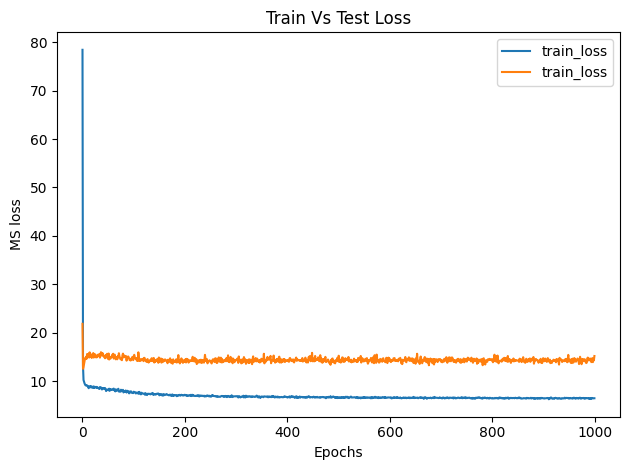

In [30]:
plt.plot(history['loss'], label = 'train_loss')
plt.plot(history['val_loss'], label = 'train_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MS loss')
plt.title('Train Vs Test Loss')
plt.tight_layout()
plt.show()

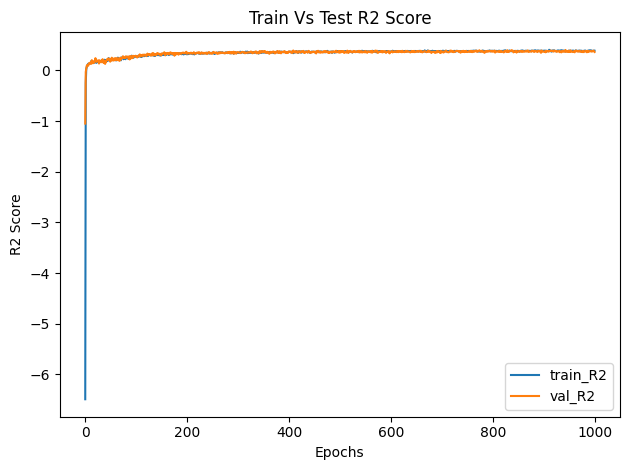

In [31]:
plt.plot(history['R2'], label = 'train_R2')
plt.plot(history['val_R2'], label = 'val_R2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('Train Vs Test R2 Score')
plt.tight_layout()
plt.show()

In [32]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)
with torch.no_grad():
  predicted = model(X_test_tensor)
  print("MSE # {} ".format(mean_squared_error(y_test_tensor, predicted)))
  print("MAE # {} ".format(mean_absolute_error(y_test_tensor, predicted)))
  print("R2  # {} ".format(r2_score(y_test_tensor, predicted)))

MSE # 6.341601848602295 
MAE # 1.8050098419189453 
R2  # 0.3633750869684367 


In [44]:
pred   = pd.DataFrame(np.round(predicted), columns = ['predicted'])
pred   = pred.astype('int')
actual = pd.DataFrame(y_test, columns = ['actual'])

pd.concat([actual, pred], axis = 1).sample(5)

,actual,predicted
985,8,8
639,10,11
676,13,8
48,9,10
433,12,10
